In [534]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
import math
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

df = pd.read_excel('/Users/seanwhite/OneDrive - University of Greenwich/Documents/Machine Learning/Coursework/COMP 1886 - Coursework dataset.xlsx')


In [3]:
df.describe()

,Date,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
count,1447,1432.000000,1447.000000,1417.000000,1447.000000,1447.000000
mean,2021-12-24 00:00:00,109.824930,130.305639,63.141849,121.937222,82.435708
min,2020-01-01 00:00:00,36.920000,40.160000,5.950000,86.360000,7.900000
25%,2020-12-27 12:00:00,84.057500,97.455000,31.480000,105.685000,60.530000
50%,2021-12-24 00:00:00,114.040000,135.750000,71.840000,114.520000,91.320000
75%,2022-12-20 12:00:00,136.452500,156.865000,87.750000,140.350000,106.400000
max,2023-12-17 00:00:00,166.850000,500.000000,127.960000,188.250000,139.460000
std,NaN,31.123886,39.759992,31.361024,20.224708,33.906750


In [480]:
df.shape

(1081, 9)

In [525]:
df.columns = [col.strip() for col in df.columns]
df.rename(columns={'80% of the expenses were made by': 'Private/ Public Sector', '80% of the expenses were made by .1': 'Gender', '80% of the expenses were made in the following regions': 'Region'}, inplace=True)

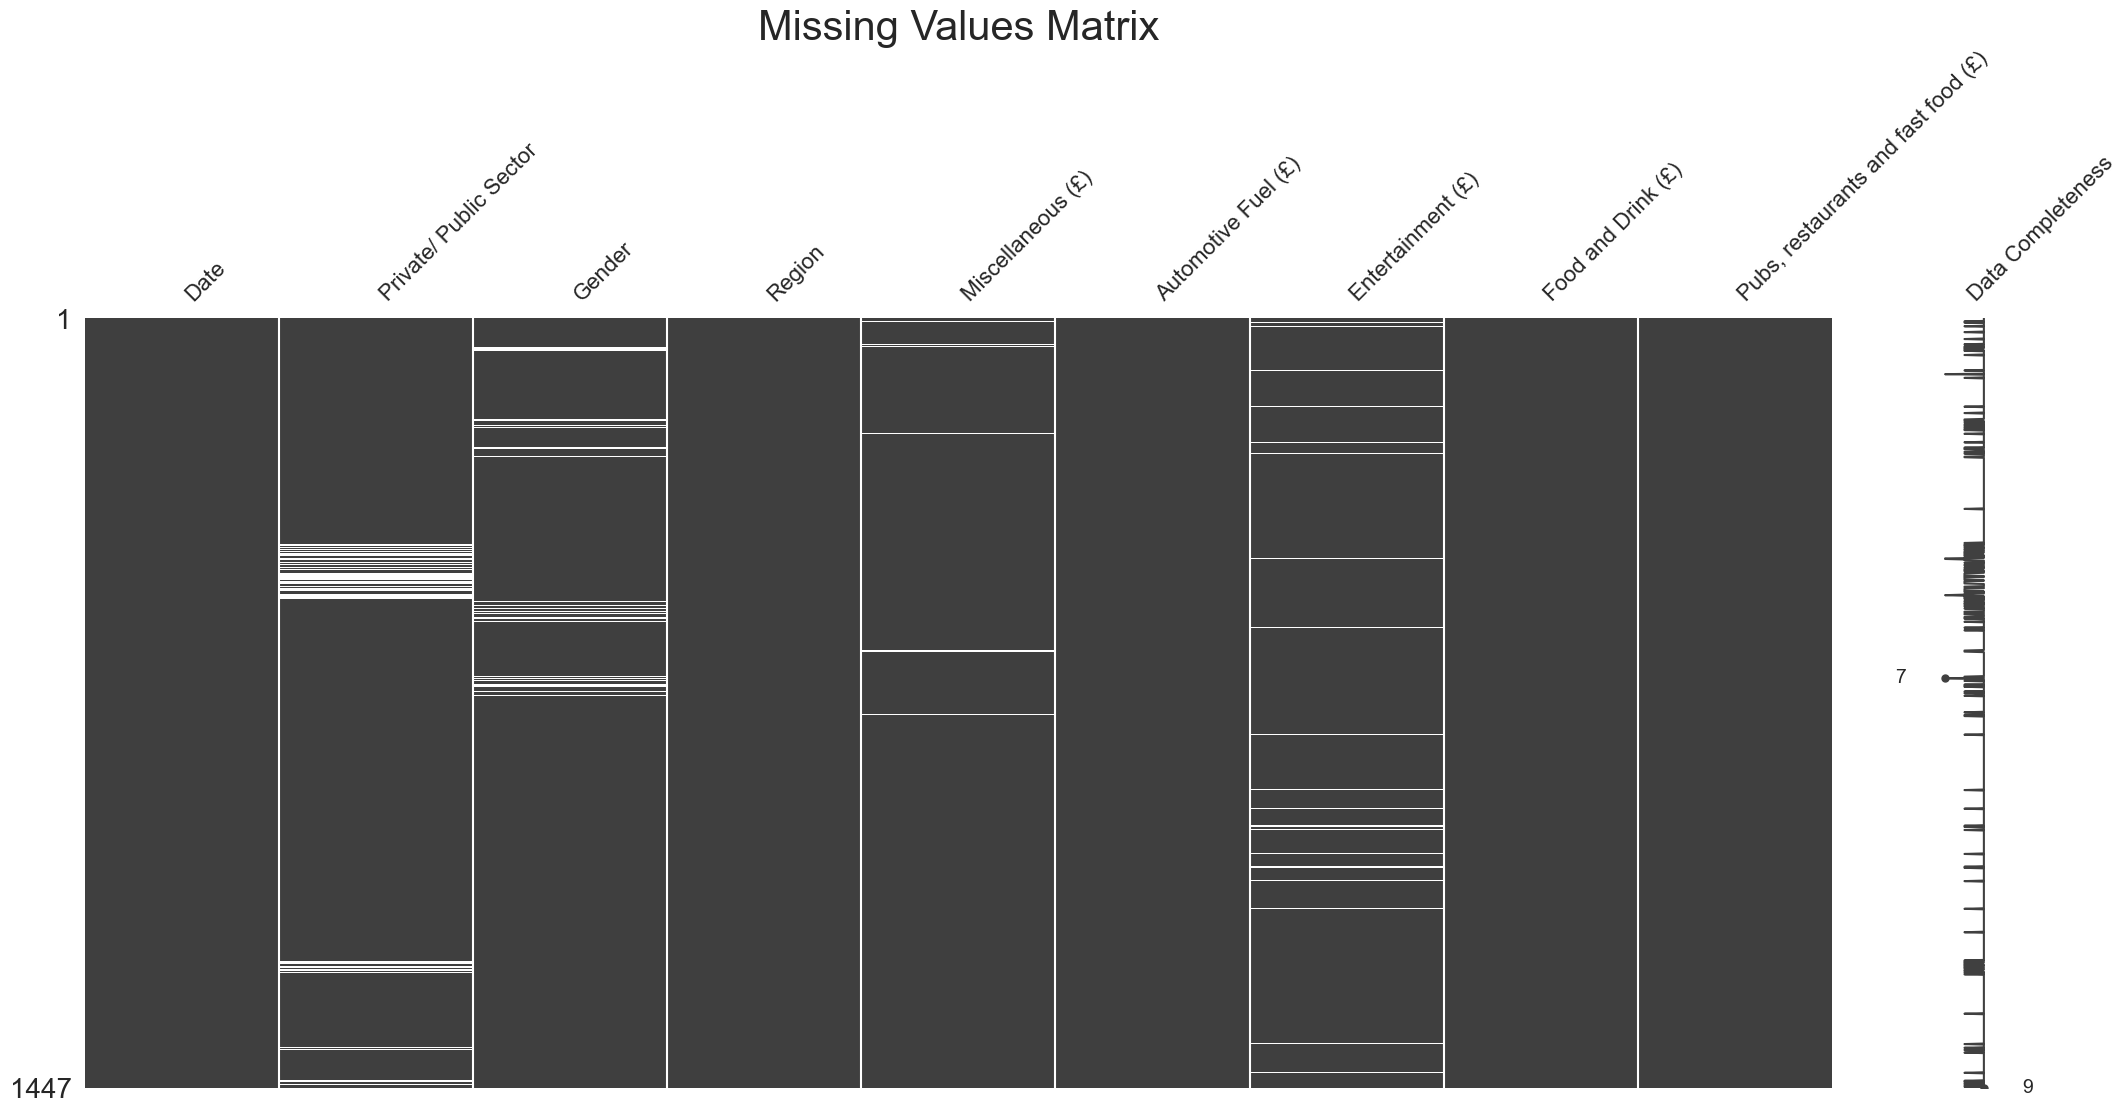

In [526]:
#Task 1
ax = msno.matrix(df, labels=True)
ax.set_title('Missing Values Matrix', fontsize=30)
plt.show()

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

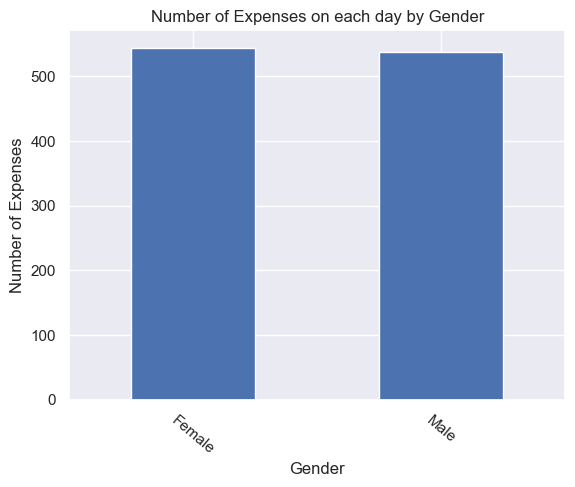

In [481]:
#Task 1
df.Gender.fillna('Unavailable', inplace=True)
df.Gender.value_counts().plot(kind='bar')
plt.title('Number of Expenses on each day by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Expenses')
plt.xticks(rotation=320)

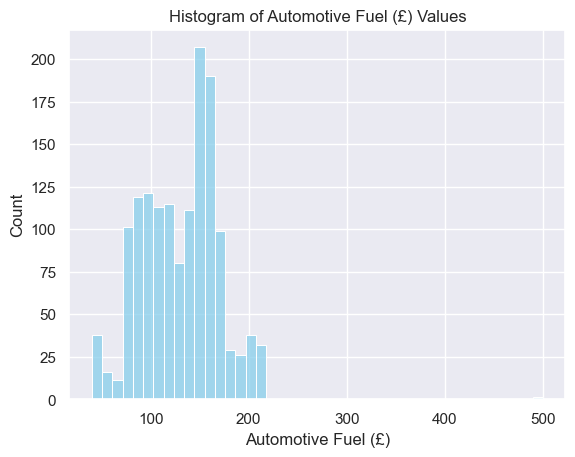

In [463]:
#Task 1
ax = sns.histplot(df['Automotive Fuel (£)'], color='skyblue')
ax.set_title('Histogram of Automotive Fuel (£) Values')
plt.show()

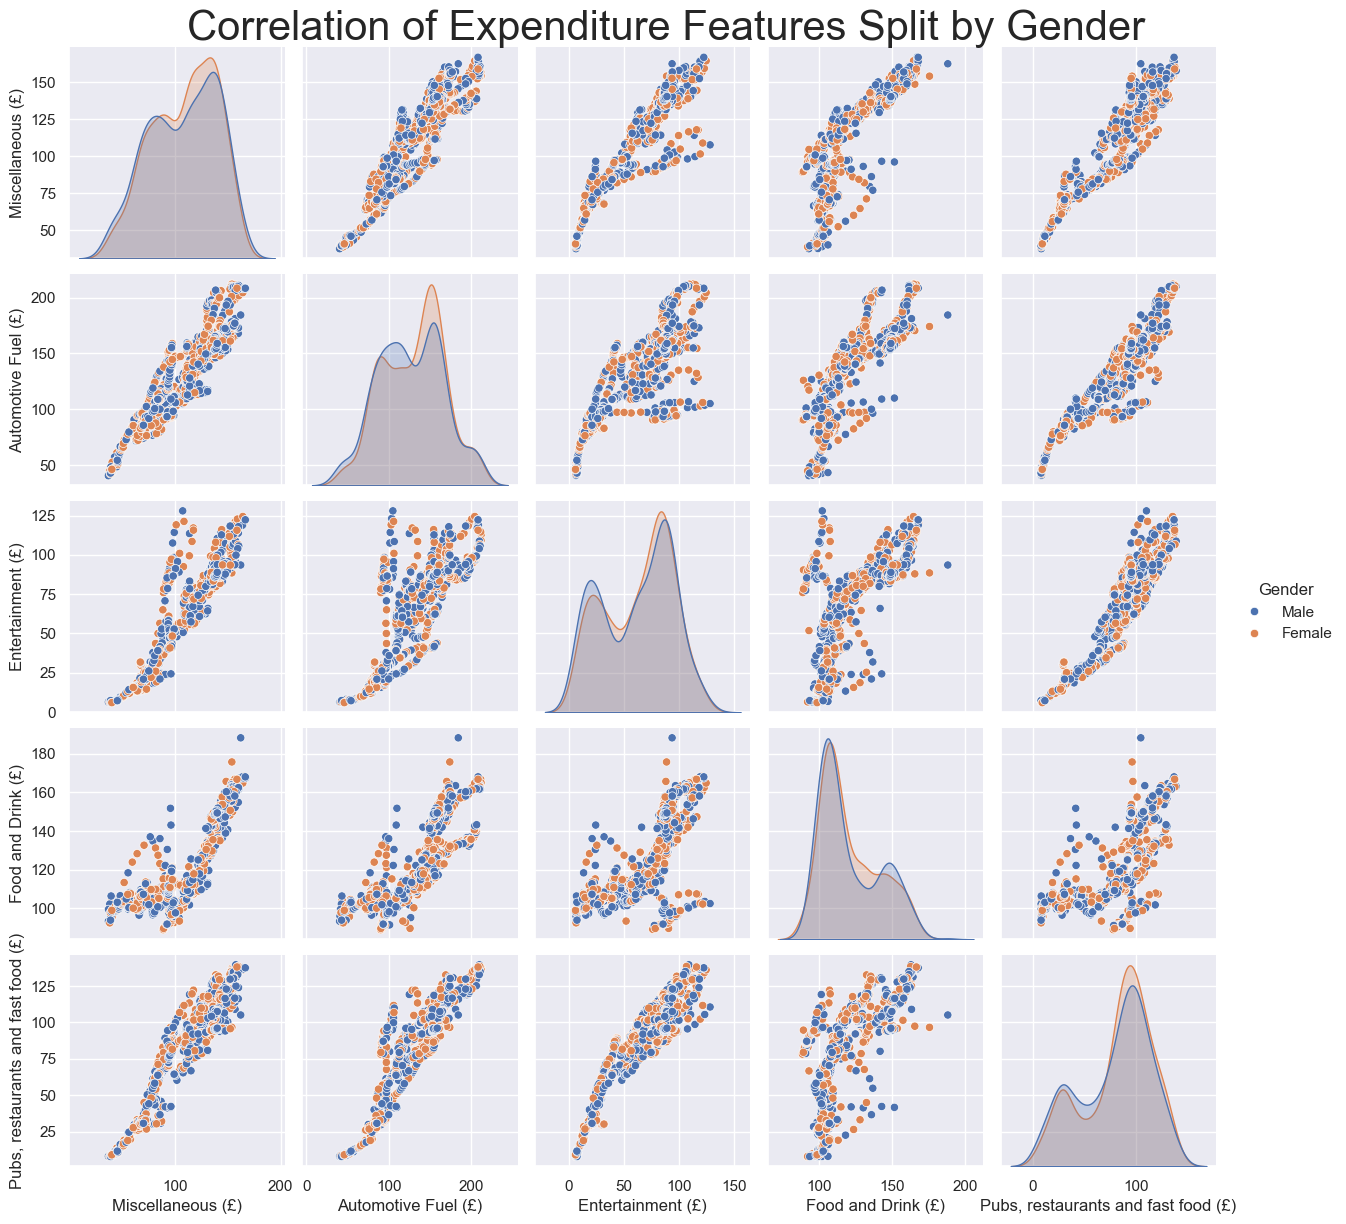

In [484]:
#Task 1
sns.pairplot(df, hue='Gender')
plt.suptitle('Correlation of Expenditure Features Split by Gender', fontsize=30)
plt.subplots_adjust(top=0.95)
plt.show()

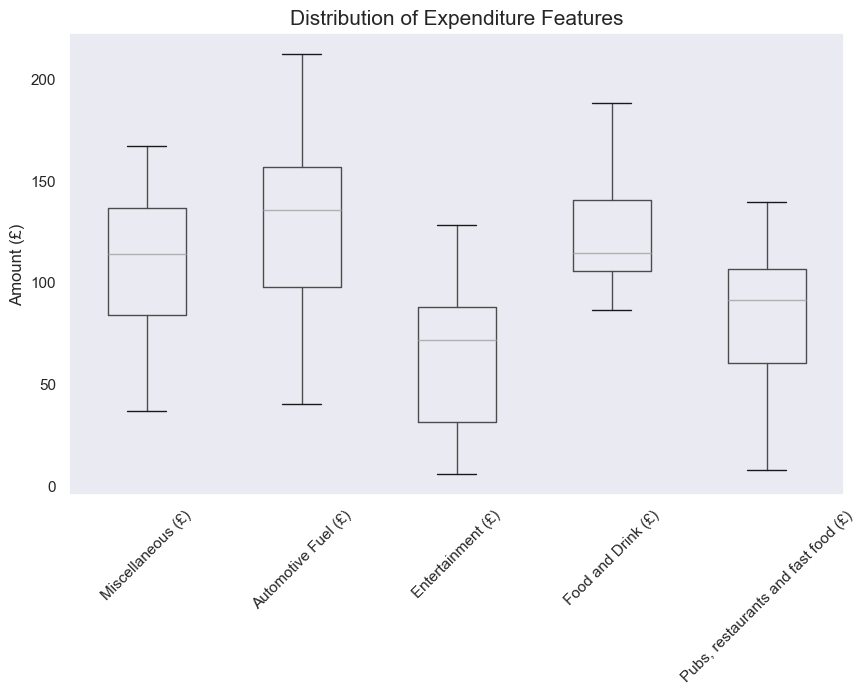

In [495]:
#Task 1
expenditure = df[["Miscellaneous (£)", "Automotive Fuel (£)", "Entertainment (£)", "Food and Drink (£)", "Pubs, restaurants and fast food (£)"]]

plt.figure(figsize=(10, 6))
expenditure.boxplot()
plt.title('Distribution of Expenditure Features', fontsize=15)
plt.ylabel('Amount (£)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [527]:
#Task 2
df.drop(df[df['Gender'] == 'Other'].index, inplace=True, axis=0)
df['Gender'] = df['Gender'].replace('Unavailable', np.nan)
df['Gender'].ffill(inplace=True)
df['Gender'].unique()

/var/folders/9h/nw62c25n4nb5xvym0cctb6yc0000gn/T/ipykernel_6295/1421878788.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].ffill(inplace=True)


array(['Male', 'Female'], dtype=object)

In [528]:
#Task 2
df['Miscellaneous (£)'].fillna(np.mean(df['Miscellaneous (£)']), inplace=True)
df

/var/folders/9h/nw62c25n4nb5xvym0cctb6yc0000gn/T/ipykernel_6295/2896083222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Miscellaneous (£)'].fillna(np.mean(df['Miscellaneous (£)']), inplace=True)


,Date,Private/ Public Sector,Gender,Region,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,2020-01-01,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2020-01-02,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,2020-01-03,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00
3,2020-01-04,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54
4,2020-01-05,Private sector,Female,E12000003,113.75,135.02,99.38,107.01,113.30
...,...,...,...,...,...,...,...,...,...
1442,2023-12-13,Public sector,Male,E12000006,137.50,153.44,85.91,148.46,95.29
1443,2023-12-14,NaN,Male,E12000007,138.09,153.78,86.00,148.85,95.73
1444,2023-12-15,Public sector,Male,S92000003,139.11,154.57,86.52,148.92,95.69
1445,2023-12-16,Public sector,Male,E12000002,139.60,157.61,87.51,149.24,95.41


In [529]:
#Task 2
df['Entertainment (£)'].fillna(np.mean(df['Entertainment (£)']), inplace=True)
df

/var/folders/9h/nw62c25n4nb5xvym0cctb6yc0000gn/T/ipykernel_6295/2096923269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Entertainment (£)'].fillna(np.mean(df['Entertainment (£)']), inplace=True)


,Date,Private/ Public Sector,Gender,Region,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,2020-01-01,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2020-01-02,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,2020-01-03,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00
3,2020-01-04,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54
4,2020-01-05,Private sector,Female,E12000003,113.75,135.02,99.38,107.01,113.30
...,...,...,...,...,...,...,...,...,...
1442,2023-12-13,Public sector,Male,E12000006,137.50,153.44,85.91,148.46,95.29
1443,2023-12-14,NaN,Male,E12000007,138.09,153.78,86.00,148.85,95.73
1444,2023-12-15,Public sector,Male,S92000003,139.11,154.57,86.52,148.92,95.69
1445,2023-12-16,Public sector,Male,E12000002,139.60,157.61,87.51,149.24,95.41


In [530]:
#Task 2
z_scores = st.zscore(df['Automotive Fuel (£)'])
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
df = df.drop(df.index[outlier_indices])

In [531]:
#Task 2
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler().fit(df[numeric_cols])
df_scaled = scaler.transform(df[numeric_cols])
df[numeric_cols] = df_scaled
df

,Date,Private/ Public Sector,Gender,Region,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,2020-01-01,Private sector,Male,E12000001,0.591309,0.491828,0.881649,0.129130,0.845166
1,2020-01-02,Private sector,Female,E12000007,0.619173,0.512360,0.910909,0.184126,0.867057
2,2020-01-03,Private sector,Female,E12000006,0.620099,0.533647,0.899516,0.186342,0.867285
3,2020-01-04,Private sector,Female,E12000004,0.609602,0.551038,0.840423,0.190673,0.848586
4,2020-01-05,Private sector,Female,E12000003,0.590151,0.550049,0.765757,0.181708,0.801155
...,...,...,...,...,...,...,...,...,...
1442,2023-12-13,Public sector,Male,E12000006,0.773464,0.657186,0.655356,0.599214,0.664260
1443,2023-12-14,NaN,Male,E12000007,0.778018,0.659164,0.656094,0.603143,0.667604
1444,2023-12-15,Public sector,Male,S92000003,0.785891,0.663759,0.660356,0.603848,0.667300
1445,2023-12-16,Public sector,Male,E12000002,0.789673,0.681440,0.668470,0.607071,0.665172


MSE: 0.0005931044958075676
RMSE: 0.024353736793510102
MAE: 0.016251793515394714
R2: 0.9902476320854527


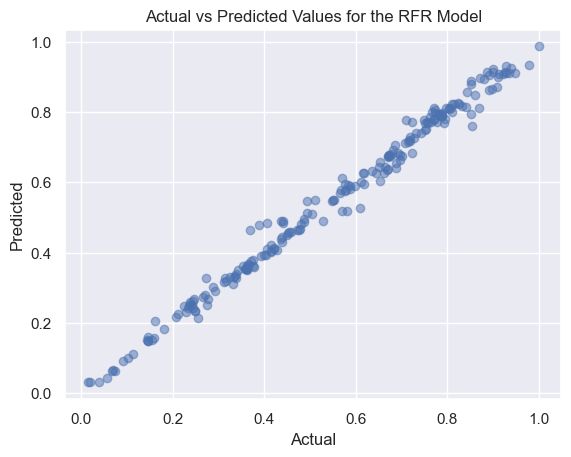

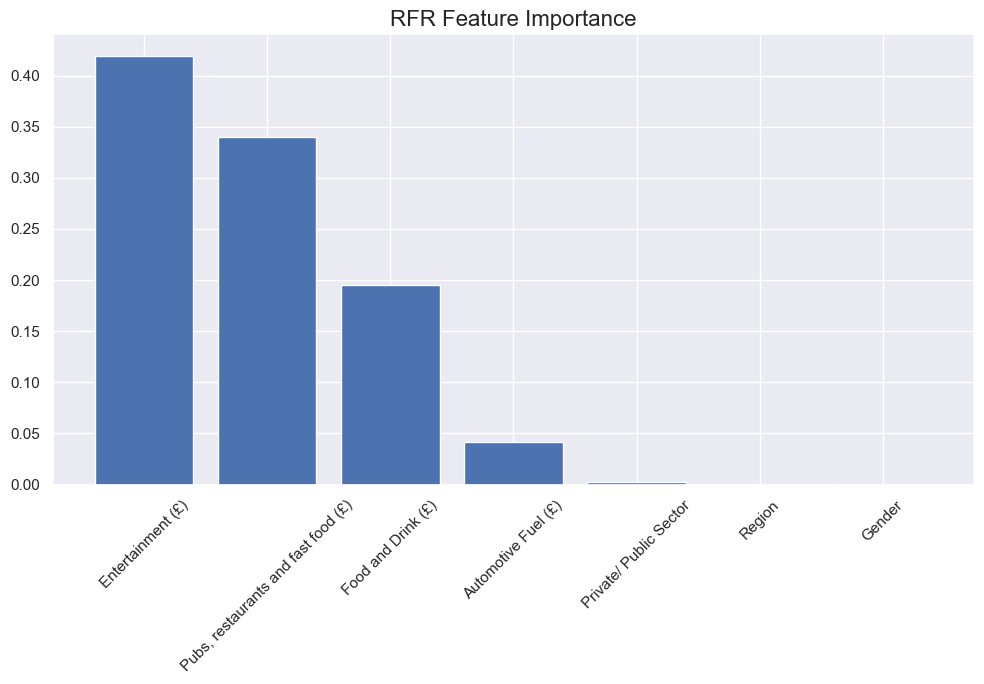

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


KeyboardInterrupt: 

In [533]:
#Task 3
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Private/ Public Sector'] = le.fit_transform(df['Private/ Public Sector'])
df['Region'] = le.fit_transform(df['Region'])

features = df.drop(['Date', 'Miscellaneous (£)'], axis=1)
target = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=43)

model = RandomForestRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1, n_estimators=200, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}\n'
      f'RMSE: {rmse}\n'
      f'MAE: {mae}\n'
      f'R2: {r2}')

#Scatter Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values for the RFR Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#Feature Importance
feature_names = df.drop(['Date', 'Miscellaneous (£)'], axis=1).columns
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 7))
plt.title('RFR Feature Importance', fontsize=16)
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=45)
plt.tight_layout()
plt.show()

#Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 4, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=43),
                           param_grid=param_grid,
                           cv=2,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

     0  1
0    0  1
1    0  0
2    0  0
3    1  1
4    1  0
..  .. ..
535  1  0
536  0  0
537  1  1
538  0  1
539  0  0

[540 rows x 2 columns]
Confusion Matrix:
[[153 120]
 [109 158]]Accuracy Score: 0.575925925925926
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       273
           1       0.57      0.59      0.58       267

    accuracy                           0.58       540
   macro avg       0.58      0.58      0.58       540
weighted avg       0.58      0.58      0.58       540


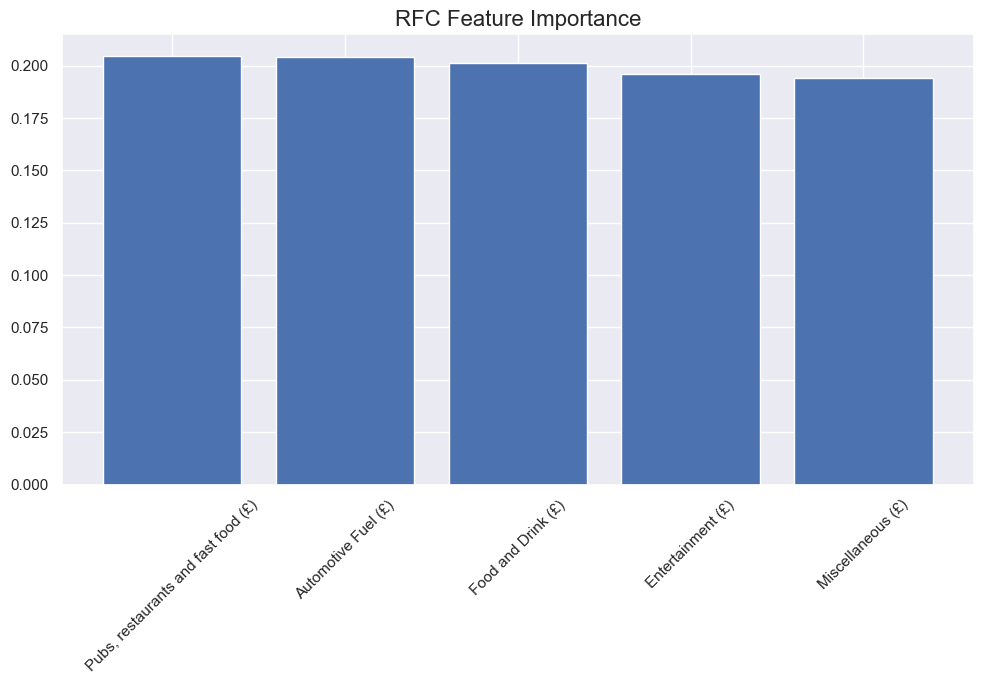

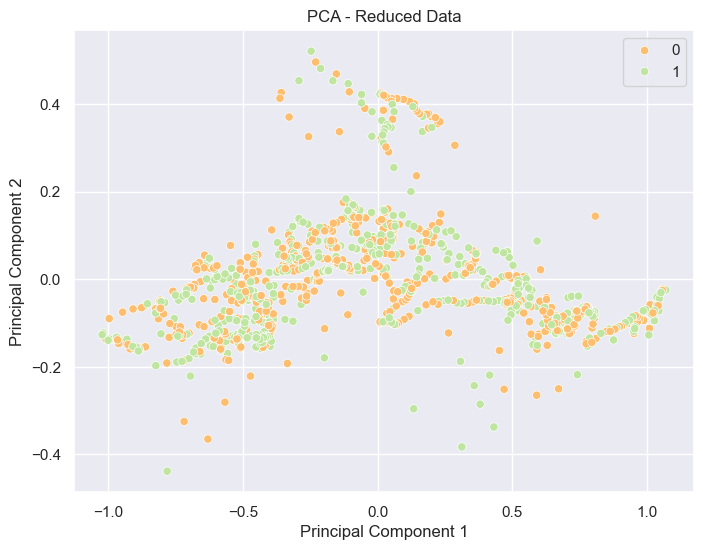

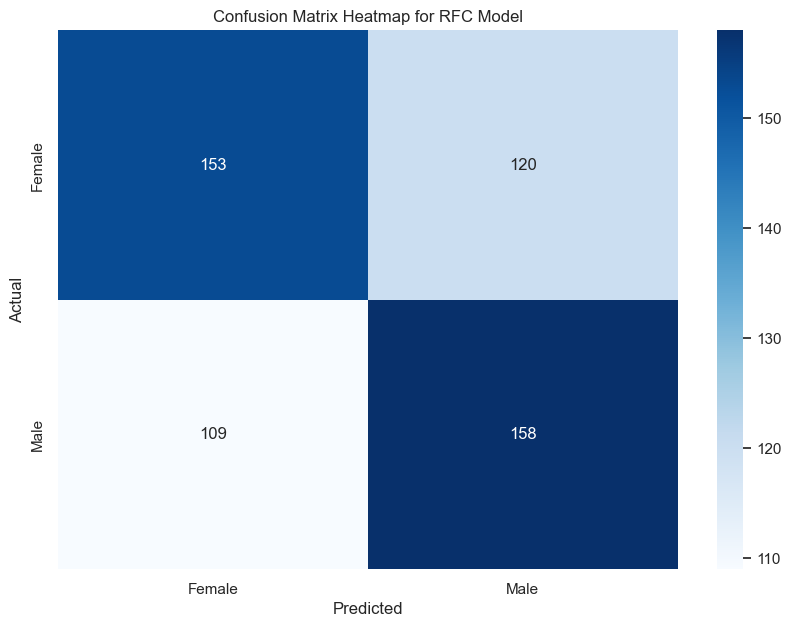

In [520]:
#Task 4
X = df.iloc[:, 4:].values
y = df.iloc[:, 2].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rf_model = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=21)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

print(pd.DataFrame(result))
cm = confusion_matrix(y_test, y_pred)
AS = accuracy_score(y_test, y_pred)
cl = classification_report(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}'
      f'Accuracy Score: {AS}\n'
      f'Classification Report:\n{cl}')

#Feature Importance
feature_names = df.iloc[:, 4:].columns 
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 7))
plt.title('RFC Feature Importance', fontsize=16)
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=45)
plt.tight_layout()
plt.show()

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Spectral")
plt.title('PCA - Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for RFC Model')
plt.show()

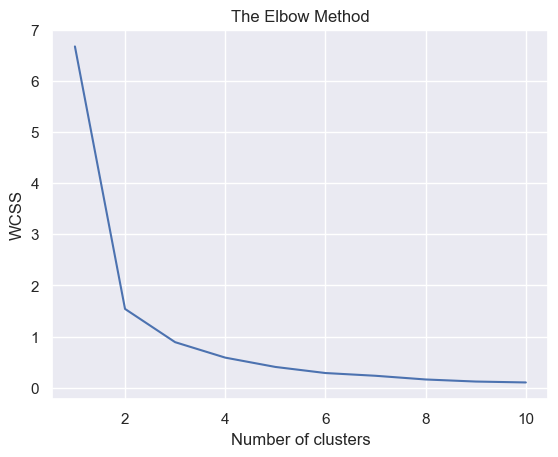

Silhouette Score: 0.747


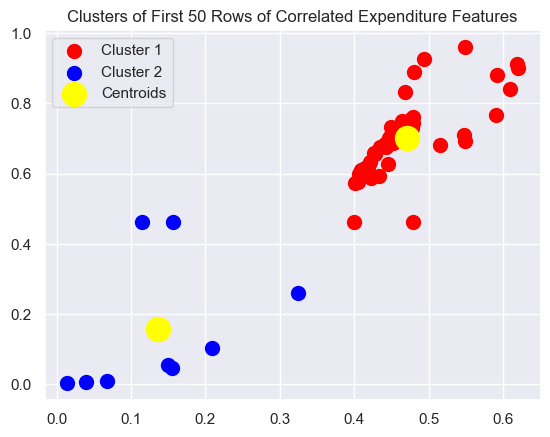

In [521]:
#Task 5
X = df.iloc[0:51, [4, 6, 8]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

score = silhouette_score(X, y_kmeans, metric='euclidean')
print('Silhouette Score: %.3f' % score)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of First 50 Rows of Correlated Expenditure Features')
plt.legend()
plt.show()